# Importing Libraries

In [25]:
import matplotlib.pyplot as plt
import numpy as np

## CODE THAT IS GOING TO SAVE THOES CROPED IMAGES

In [29]:
def crop_symbols(image):

    gray = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
    _, binary = cv2.threshold(gray.astype(np.uint8), 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cropped_images = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        x -= 5
        y -= 5
        w += 10
        h += 10
        cropped = image[y:y+h, x:x+w]
        cropped_images.append(cropped)
        return cropped_images

In [30]:
image = plt.imread('img.jpeg')
cropped_symbols = crop_symbols(image)

# Iterate over the cropped symbol images and show them on a plot

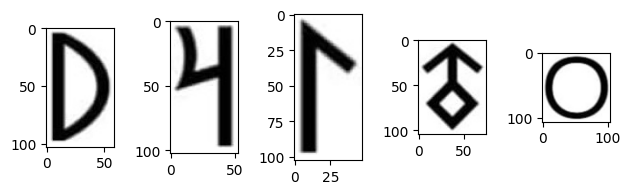

In [37]:
for idx, symbol in enumerate(cropped_symbols):
    plt.subplot(1, len(cropped_symbols), idx+1)
    plt.imshow(symbol)

plt.tight_layout()
plt.show()

# Saving The character Images

In [36]:
for idx, symbol in enumerate(cropped_symbols):
    plt.imsave(f'char_{idx}.jpg', symbol)